[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TSM']: Exception('%ticker%: 1m data not available for startTime=1708923600 and endTime=1709528400. The requested range must be within the last 30 days.')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

No data available for plotting in this chunk.


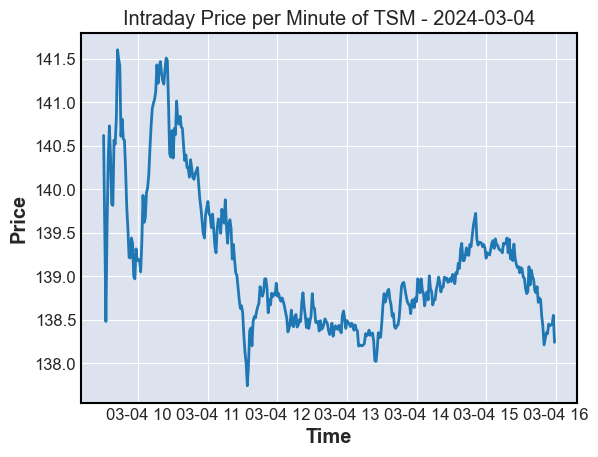

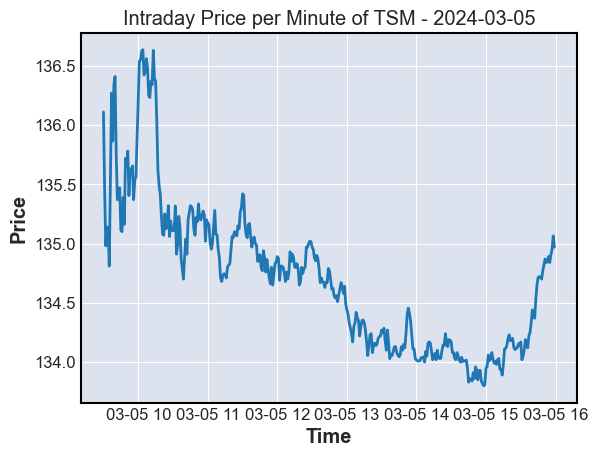

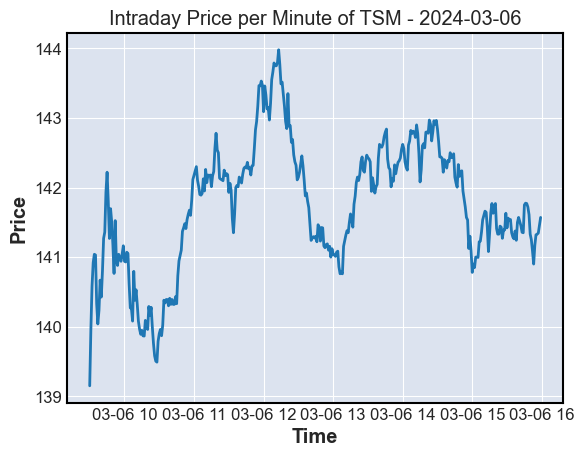

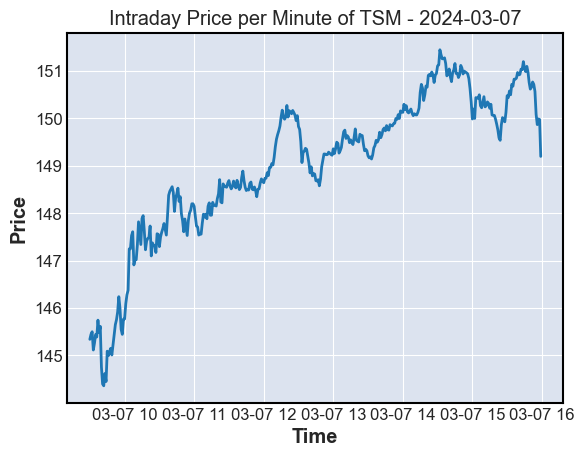

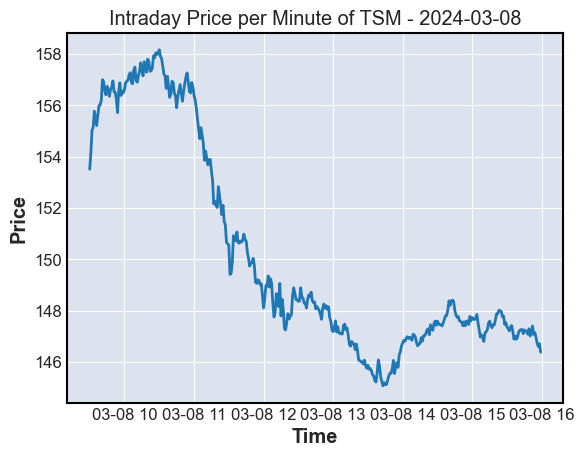

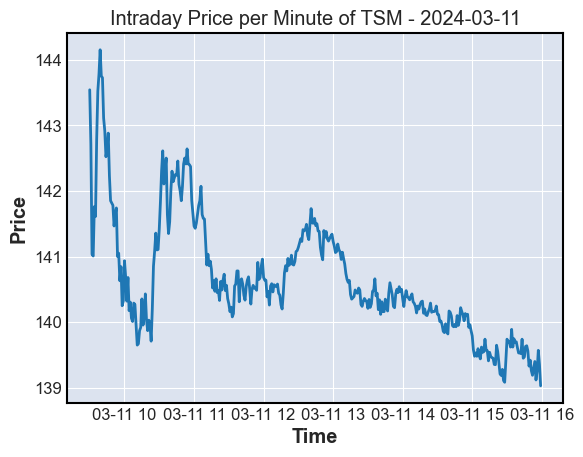

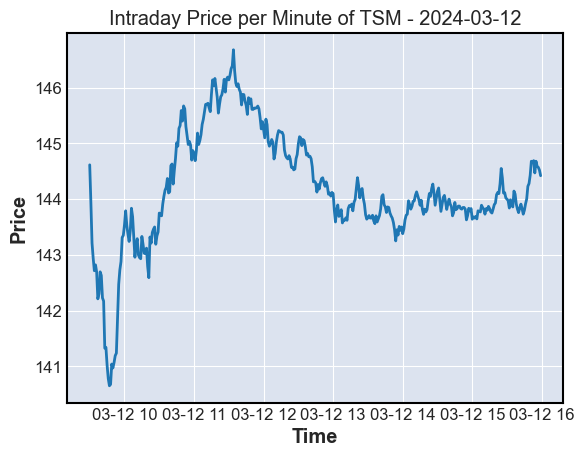

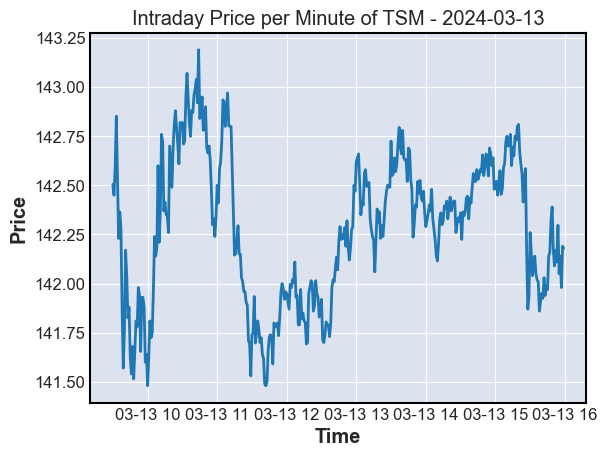

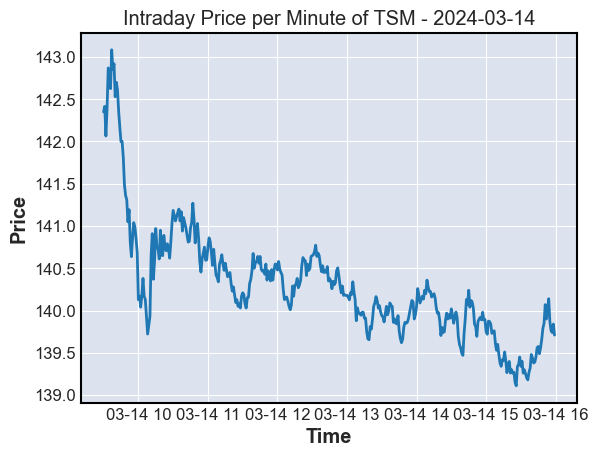

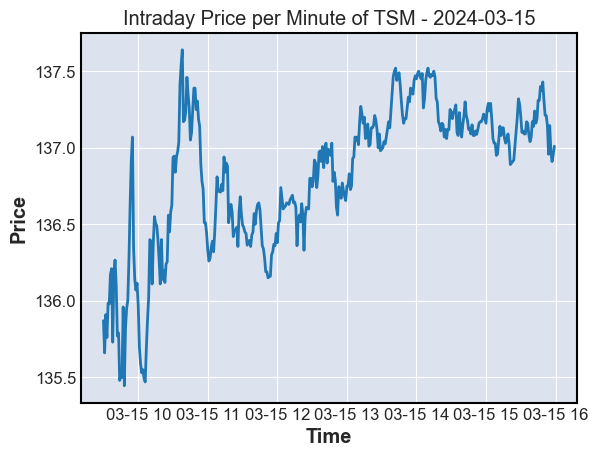

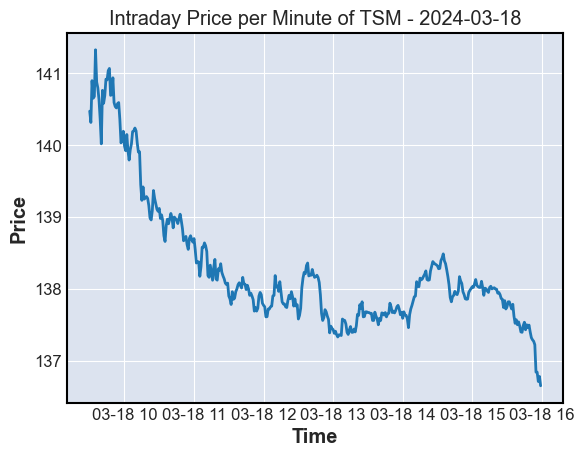

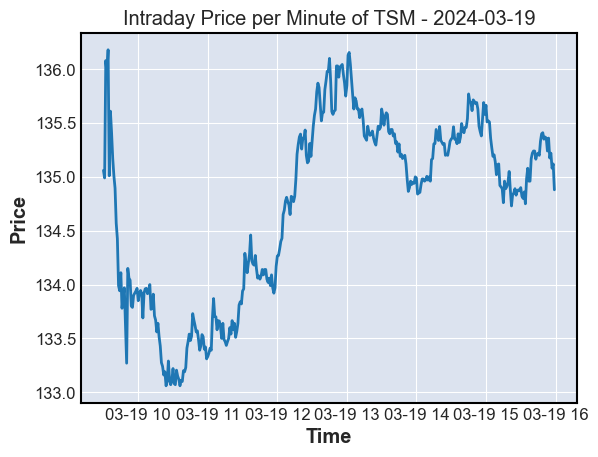

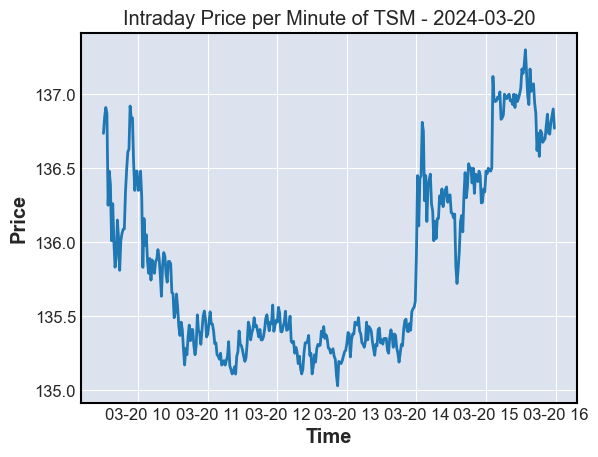

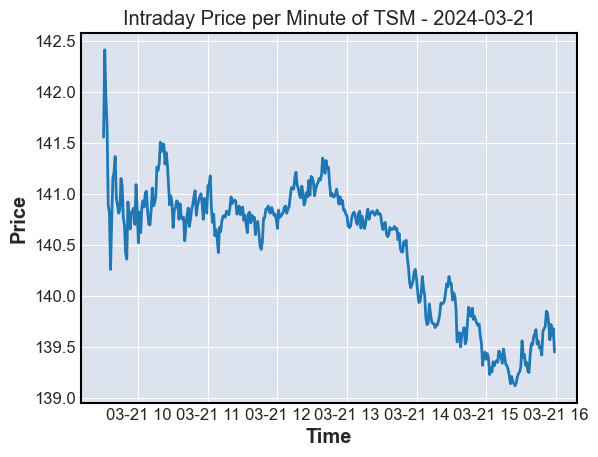

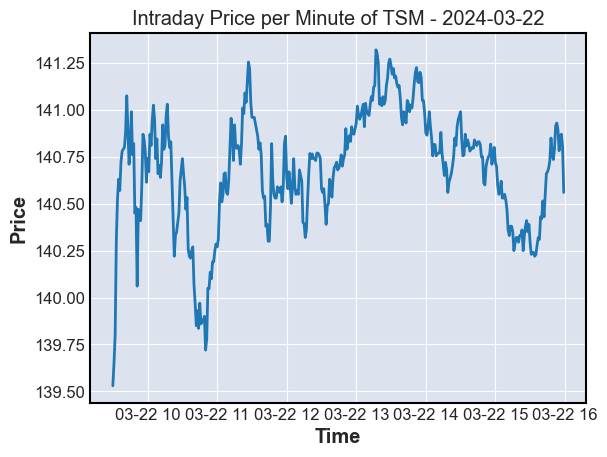

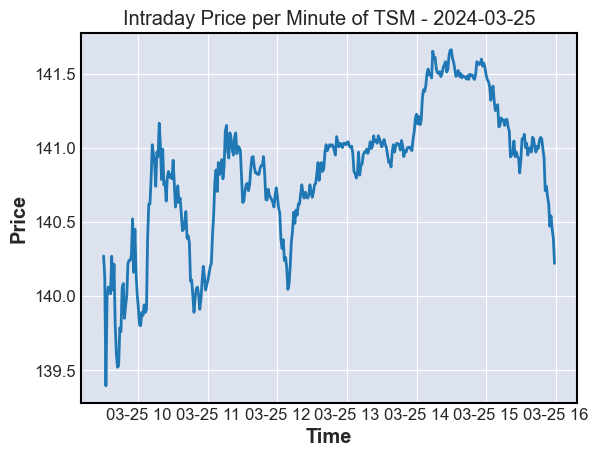

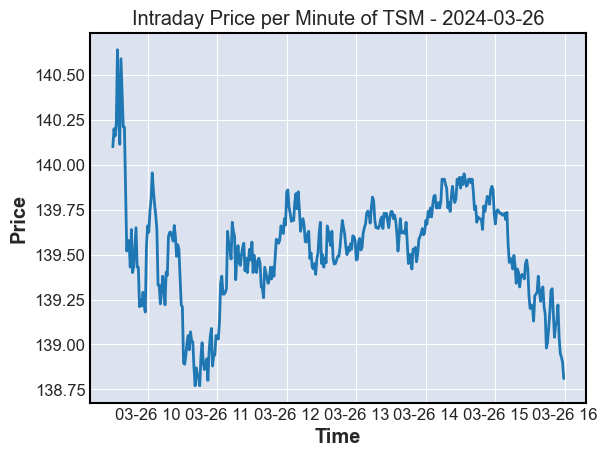

In [44]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Function to fetch intraday data for a given date range
def fetch_intraday_data(ticker_symbol, start_date, end_date):
    try:
        return yf.download(ticker_symbol, start=start_date, end=end_date, interval="1m")
    except Exception as e:
        print(f"Failed to download data for {ticker_symbol}: {e}")
        return None

# Define the ticker symbol and date range
ticker_symbol = "TSM"
end_date = datetime.now().date()
start_date = end_date - timedelta(days=30)

# Initialize a list to store stock data chunks
stock_data_chunks = []

# Download intraday data in chunks of 7 days
while start_date < end_date:
    next_date = start_date + timedelta(days=7)
    if next_date > end_date:
        next_date = end_date
    stock_data_chunk = fetch_intraday_data(ticker_symbol, start_date, next_date)
    if stock_data_chunk is not None:
        stock_data_chunks.append(stock_data_chunk)
    start_date = next_date

# Plot intraday price per minute for each day within each chunk
for stock_data_chunk in stock_data_chunks:
    if not stock_data_chunk.empty:
        for day, data in stock_data_chunk.groupby(stock_data_chunk.index.date):
            plt.figure()
            plt.plot(data.index, data["Close"])
            plt.xlabel("Time")
            plt.ylabel("Price")
            plt.title("Intraday Price per Minute of " + ticker_symbol + " - " + str(day))
            plt.show()
    else:
        print(f"No data available for plotting in this chunk.")


In [14]:
import boto3
from botocore.config import Config

# Initialize a session using your credentials
session = boto3.Session(
   aws_access_key_id='fcfedc12-19c7-4283-89b4-3d6144865bf5',
   aws_secret_access_key='DTc8n47jA_nApfGqD4aqKv9ntIHFOj0U',
)

# Create a client with your session and specify the endpoint
s3 = session.client(
   's3',
   endpoint_url='https://files.polygon.io',
   config=Config(signature_version='s3v4'),
)

# List Example
# Initialize a paginator for listing objects
paginator = s3.get_paginator('list_objects_v2')

# Choose the appropriate prefix depending on the data you need:
# - 'global_crypto' for global cryptocurrency data
# - 'global_forex' for global forex data
# - 'us_indices' for US indices data
# - 'us_options_opra' for US options (OPRA) data
# - 'us_stocks_sip' for US stocks (SIP) data
prefix = 'us_stocks_sip'  # Example: Change this prefix to match your data need

# List objects using the selected prefix
print("List of files:")
res = []
for page in paginator.paginate(Bucket='flatfiles', Prefix=prefix):
    for obj in page['Contents']:
        # print(obj['Key'])
        res.append(obj['Key'])


List of files:
20656


In [15]:
aws s3 ls s3://flatfiles/us_stocks_sip/minute_aggs_v1/2024/ --endpoint-url https://files.polygon.io --profile polygon

aws s3 cp s3://flatfiles/us_stocks_sip/minute_aggs_v1/2024/03/ ./polygon_data/minute_aggs/ --endpoint-url https://files.polygon.io --profile polygon

aws s3 cp s3://flatfiles/us_stocks_sip/minute_aggs_v1/2023/ ./polygon_data/minute_aggs/ --recursive --endpoint-url https://files.polygon.io --profile polygon

SyntaxError: invalid syntax (386920573.py, line 1)

In [23]:
# df = pd.read_csv("/Users/brandon/Documents/2024-01-19.csv.gz", compression='gzip')
len(df)

1489744

In [33]:
pd.set_option('display.max_columns', None)

# Set option to display all rows
pd.set_option('display.max_rows', None)

# ticker = 'AAPL'
# ticker = 'FNV'

ticker_df = df[df['ticker'] == ticker]
print(len(ticker_df))
ticker_df

In [34]:
# # df['window_start'] = pd.to_datetime(df['window_start'], unit='ns').dt.strftime('%Y-%m-%d %H:%M:%S')
# # unique_timestamps = sorted(set(df['window_start']))
# unique_timestamps = sorted(set(pd.to_datetime(df['window_start']).dt.strftime('%Y-%m-%d %H:%M:%S')))

# unique_timestamps

In [37]:
import pandas as pd
from datetime import datetime, timedelta

tickers = ['MSFT', 'NVDA']
path = "/Users/brandon/Documents/polygon_data/minute_aggs/2023/01/2023-01-03.csv.gz"
df = pd.read_csv(path)

In [41]:
import os
import pandas as pd
import glob

# Specify the directory containing the data files
data_dir = "/Users/brandon/Documents/polygon_data/minute_aggs/"

# Specify the ticker to filter records
ticker = "MSFT"  

# Create a list to store monthly dataframes
monthly_dfs = []

# Loop through each year from 2019 to 2024
for year in range(2019, 2020):
    # Loop through each month
    for month in range(1, 13):
        # Construct the path to the data file
        file_path = os.path.join(data_dir, str(year), "{:02d}".format(month), f"{year}-{month:02d}-*.csv.gz")
        
        # Check if the file exists
        if glob.glob(file_path):
            print(f'loading: {file_path}')
            # Read the data file into a DataFrame
            df = pd.concat((pd.read_csv(f, compression='gzip') for f in glob.glob(file_path)), ignore_index=True)
            
            # Filter records for the specified ticker
            df_filtered = df[df['ticker'] == ticker]
            
            # Append the filtered DataFrame to the list
            monthly_dfs.append(df_filtered)

# Concatenate all monthly DataFrames into a single DataFrame
combined_df = pd.concat(monthly_dfs, ignore_index=True)

# Output the combined DataFrame to monthly files
output_dir = f"/Users/brandon/Documents/stonk_bot_data/{ticker}/" 
os.makedirs(output_dir, exist_ok=True)

for year_month, group in combined_df.groupby(combined_df['timestamp'].dt.to_period('M')):
    output_file = os.path.join(output_dir, f"{year_month}_{ticker}.csv")
    group.to_csv(output_file, index=False)
    print(f"Saved {output_file}")


loading: /Users/brandon/Documents/polygon_data/minute_aggs/2019/03/2019-03-*.csv.gz
loading: /Users/brandon/Documents/polygon_data/minute_aggs/2019/04/2019-04-*.csv.gz
loading: /Users/brandon/Documents/polygon_data/minute_aggs/2019/05/2019-05-*.csv.gz
loading: /Users/brandon/Documents/polygon_data/minute_aggs/2019/06/2019-06-*.csv.gz
loading: /Users/brandon/Documents/polygon_data/minute_aggs/2019/07/2019-07-*.csv.gz
loading: /Users/brandon/Documents/polygon_data/minute_aggs/2019/08/2019-08-*.csv.gz


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [45]:
pip install polars

  Obtaining dependency information for polars from https://files.pythonhosted.org/packages/a7/25/1bff5ccec18783b756e171d4fb42f72e1fba0f61d0ee86bbf53ba1a3083b/polars-0.20.16-cp38-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 43.8 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import os
import glob
import gzip
import polars as pl
from concurrent.futures import ThreadPoolExecutor

# Specify the directory containing the data files
data_dir = "/Users/brandon/Documents/polygon_data/minute_aggs/"

# Specify the ticker to filter records
# ticker = "AAPL"
ticker = "NVDA"

# Create a function to process each file
def process_file(file_path):
    # Read the data file into a DataFrame
    with gzip.open(file_path, 'rb') as f:
        df = pl.read_csv(f)
    
    # Filter records for the specified ticker
    df_filtered = df.filter(df['ticker'] == ticker)
    
    return df_filtered

# Create a dictionary to store monthly dataframes
monthly_dfs = {}

# Specify the output directory
output_dir = f"/Users/brandon/Documents/stonk_bot_data/{ticker}/"
os.makedirs(output_dir, exist_ok=True)

# Function to process files for a given year and month
def process_month(year, month):
    # Construct the path to the month directory
    month_dir = os.path.join(data_dir, str(year), "{:02d}".format(month))
    
    # Check if the month directory exists
    if not os.path.exists(month_dir):
        print(f"No data found for {year}-{month:02d}")
        return
    
    # Iterate over files in the month directory
    for file in os.listdir(month_dir):
        if file.endswith(".csv.gz"):
            file_path = os.path.join(month_dir, file)
            
            # Process the file and get the DataFrame
            df_filtered = process_file(file_path)
            
            # Get the year and month for the output file name
            year_month = f"{year}-{month:02d}"
            
            # Append the filtered DataFrame to the monthly dataframe
            if year_month not in monthly_dfs:
                monthly_dfs[year_month] = df_filtered
            else:
                monthly_dfs[year_month] = monthly_dfs[year_month].extend(df_filtered)
            
            # Print the loaded file and the output path
            print(f"Loaded {file_path}")
            output_file = os.path.join(output_dir, f"{year_month}_{ticker}.csv")
            print(f"Output path: {output_file}")

# Use ThreadPoolExecutor to parallelize processing
with ThreadPoolExecutor(max_workers=8) as executor:
    # Loop through each year from 2019 to 2020
    for year in range(2019, 2025):
        # Loop through each month
        for month in range(1, 13):
            # Submit each month for processing
            executor.submit(process_month, year, month)

# Output the combined monthly DataFrames to files
for year_month, df in monthly_dfs.items():
    output_file = os.path.join(output_dir, f"{year_month}_{ticker}.csv")
    df.write_csv(output_file)
    print(f"Saved {output_file}")


/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_86364/4228378397.py:18: UserWarning:

Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.



Loaded /Users/brandon/Documents/polygon_data/minute_aggs/2019/08/2019-08-26.csv.gz
Output path: /Users/brandon/Documents/stonk_bot_data/NVDA/2019-08_NVDA.csv
Loaded /Users/brandon/Documents/polygon_data/minute_aggs/2019/09/2019-09-04.csv.gz
Output path: /Users/brandon/Documents/stonk_bot_data/NVDA/2019-09_NVDA.csv
Loaded /Users/brandon/Documents/polygon_data/minute_aggs/2019/04/2019-04-04.csv.gz
Output path: /Users/brandon/Documents/stonk_bot_data/NVDA/2019-04_NVDA.csv
Loaded /Users/brandon/Documents/polygon_data/minute_aggs/2019/06/2019-06-05.csv.gz
Output path: /Users/brandon/Documents/stonk_bot_data/NVDA/2019-06_NVDA.csv
Loaded /Users/brandon/Documents/polygon_data/minute_aggs/2019/03/2019-03-28.csv.gz
Output path: /Users/brandon/Documents/stonk_bot_data/NVDA/2019-03_NVDA.csv
Loaded /Users/brandon/Documents/polygon_data/minute_aggs/2019/05/2019-05-10.csv.gz
Output path: /Users/brandon/Documents/stonk_bot_data/NVDA/2019-05_NVDA.csv
Loaded /Users/brandon/Documents/polygon_data/minute_

In [17]:
import os
import polars as pl
import glob
import gzip
from concurrent.futures import ThreadPoolExecutor, as_completed

# Function to process a single file
def process_file(file_path, ticker, year_month, output_dir):
    with gzip.open(file_path, 'rb') as f:
        df = pl.read_csv(f)
    df_filtered = df.filter(df['ticker'] == ticker)
    output_file = os.path.join(output_dir, f"{year_month}_{ticker}.csv")
    # Since writing to the same file from multiple threads is not safe, we return the filtered DataFrame
    return df_filtered, output_file

# Specify the directory containing the data files and other parameters
data_dir = "/Users/brandon/Documents/polygon_data/minute_aggs/"
ticker = "NVDA"
output_dir = f"/Users/brandon/Documents/stonk_bot_data/{ticker}/" 
os.makedirs(output_dir, exist_ok=True)

# Create a dictionary to store monthly dataframes
monthly_dfs = {}

# Configure the maximum number of threads to use
max_workers = 8

# Loop through each year from 2019 to 2025
for year in range(2024, 2025):
    for month in range(1, 13):
        month_dir = os.path.join(data_dir, str(year), "{:02d}".format(month))
        if not os.path.exists(month_dir):
            print(f"No data found for {year}-{month:02d}")
            continue
        
        # Collect all file paths to process
        file_paths = [os.path.join(month_dir, file) for file in os.listdir(month_dir) if file.endswith(".csv.gz")]
        
        # Use ThreadPoolExecutor to process files in parallel
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            # Create a future for each file
            futures = [executor.submit(process_file, file_path, ticker, f"{year}-{month:02d}", output_dir) for file_path in file_paths]
            
            # As futures complete, process their results
            for future in as_completed(futures):
                df_filtered, output_file = future.result()
                # Append or extend the DataFrame in monthly_dfs
                year_month = os.path.basename(output_file).replace(f"_{ticker}.csv", "")
                if year_month not in monthly_dfs:
                    monthly_dfs[year_month] = df_filtered
                else:
                    monthly_dfs[year_month] = monthly_dfs[year_month].extend(df_filtered)
                print(f"Processed {output_file}")

# Output the combined monthly DataFrames to files
for year_month, df in monthly_dfs.items():
    output_file = os.path.join(output_dir, f"{year_month}_{ticker}.csv")
    df.write_csv(output_file)
    print(f"Saved {output_file}")


/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_86364/3507840052.py:10: UserWarning:

Polars found a filename. Ensure you pass a path to the file instead of a python file object when possible for best performance.



Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_NVDA.csv
Processed /Users/brandon/Documents/stonk_bot_data/NVDA/2024-01_N

In [28]:
import os
import polars as pl
import datetime as dt
from polars import Config

pl.Config.set_fmt_str_lengths(100)
pl.Config.set_tbl_rows(1000)

ticker = "NVDA"
directory_path = f"/Users/brandon/Documents/stonk_bot_data/{ticker}/"

# List all CSV files in the directory
files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(".csv")]

# Create an empty list to store DataFrames
dfs = []

# Read each CSV file and append its DataFrame to the list
for file in files:
    df = pl.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pl.concat(dfs).with_row_count(name='index')

# Convert window_start to Eastern Time
window_start_est = (df['window_start'] / 10**9).apply(
    lambda ts: dt.datetime.fromtimestamp(ts, dt.timezone.utc).astimezone(dt.timezone(dt.timedelta(hours=-5)))
)
df = df.with_columns([window_start_est.alias('window_start_est')])

# Calculate window_end as window_start + 1 minute
window_end = df['window_start'] + 60 * 10**9
df = df.with_columns([window_end.alias('window_end')])

# Convert window_end to Eastern Time
window_end_est = (df['window_end'] / 10**9).apply(
    lambda ts: dt.datetime.fromtimestamp(ts, dt.timezone.utc).astimezone(dt.timezone(dt.timedelta(hours=-5)))
)
df = df.with_columns([window_end_est.alias('window_end_est')])

# Define trading hours
pre_market_start = dt.time(4, 0)  # Pre-market starts at 4:00 AM
trading_start = dt.time(9, 30)
trading_end = dt.time(16, 0)

# Create flags for regular trading hours, after hours, and pre-market hours
regular_trading_hours = pl.when(
    (pl.col('window_start_est').dt.time() >= trading_start) &
    (pl.col('window_start_est').dt.time() <= trading_end)
).then(1).otherwise(0)

after_hours = pl.when(
    (pl.col('window_start_est').dt.time() > trading_end) |
    (pl.col('window_start_est').dt.time() < pre_market_start)
).then(1).otherwise(0)

pre_market_hours = pl.when(
    (pl.col('window_start_est').dt.time() >= pre_market_start) &
    (pl.col('window_start_est').dt.time() < trading_start)
).then(1).otherwise(0)

# Add the new columns to the DataFrame
df = df.with_columns([
    regular_trading_hours.alias('regular_trading_hours'),
    after_hours.alias('after_hours'),
    pre_market_hours.alias('pre_market_hours'),
    df['window_start_est'].dt.date().alias('transaction_date')
])

# Calculate traded value for each transaction
df = df.with_columns([
    (pl.col('volume') * pl.col('close')).alias('traded_value')
])

# Calculate cumulative totals within each trading session
df = df.with_columns([
    pl.col('traded_value').cumsum().over(['ticker', 'transaction_date']).alias('daily_traded_value'),
    pl.col('volume').cumsum().over(['ticker', 'transaction_date']).alias('daily_cumulative_volume')
])

# Calculate the VWAP for each transaction
df = df.with_columns([
    (pl.col('daily_traded_value') / pl.col('daily_cumulative_volume')).alias('daily_vwap')
])

df = df.with_columns([
    pl.col('daily_vwap').rolling_mean(window_size=2).over(["ticker"]).alias('vwap_2d'),
    pl.col('daily_vwap').rolling_mean(window_size=3).over(["ticker"]).alias('vwap_3d')
])

# Extract hour from 'window_start_est'
df = df.with_columns(pl.col('window_start_est').dt.hour().alias('hour'))

hourly_vwap_calculation = df.groupby(['ticker', 'transaction_date', 'hour']).agg([
    (pl.sum('traded_value').alias('hourly_traded_value')),
    (pl.sum('volume').alias('hourly_volume')),
    (pl.sum('traded_value') / pl.sum('volume')).alias('hourly_vwap')
])

# Merge the hourly VWAP back into the original DataFrame
df = df.join(
    hourly_vwap_calculation,
    on=['ticker', 'transaction_date', 'hour'],
    how='left'
)

df = df.sort(['ticker', 'transaction_date'])

# Define a function to calculate EMA given a series, span, and adjust flag
def ema_custom(series: pl.Series, name: str, span: int) -> pl.Series:
    alpha = 2 / (span + 1)
    ema = series.ewm_mean(com=span, adjust=False).alias(name)
    return ema

# Calculate EMA for 12 and 26 periods and add them to the DataFrame
df = df.with_columns(
    [
        ema_custom(df["close"], f"ema_{span}", span=span)
        for span in [12, 26]
    ]
)

# Calculate the MACD line
df = df.with_columns((pl.col("ema_12") - pl.col("ema_26")).alias("MACD_line"))

# Calculate the Signal line
df = df.with_columns(ema_custom(pl.col("MACD_line"), "signal_line", span=9))

# Calculate the distance between MACD and Signal lines
df = df.with_columns((pl.col("MACD_line") - pl.col("signal_line")).alias("MACD_Signal_distance"))

# Calculate the slope of the MACD line (current value - previous value)
df = df.with_columns(pl.col("MACD_line").diff().alias("MACD_slope"))

# Calculate the slope of the Signal line (current value - previous value)
df = df.with_columns(pl.col("signal_line").diff().alias("Signal_slope"))

# Identify MACD line crosses above Signal line (bullish signal)
df = df.with_columns(
    ((pl.col("MACD_line") > pl.col("signal_line")) & 
    (pl.col("MACD_line").shift(-1) <= pl.col("signal_line").shift(-1))).cast(pl.Int8).alias("MACD_cross_above")
)

# Identify MACD line crosses below Signal line (bearish signal)
df = df.with_columns(
    ((pl.col("MACD_line") < pl.col("signal_line")) & 
    (pl.col("MACD_line").shift(-1) >= pl.col("signal_line").shift(-1))).cast(pl.Int8).alias("MACD_cross_below")
)


df


/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_86364/865682040.py:24: DeprecationWarning:

`with_row_count` is deprecated. Use `with_row_index` instead. Note that the default column name has changed from 'row_nr' to 'index'.

/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_86364/865682040.py:27: DeprecationWarning:

`apply` is deprecated. It has been renamed to `map_elements`.

/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_86364/865682040.py:37: DeprecationWarning:

`apply` is deprecated. It has been renamed to `map_elements`.

/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_86364/865682040.py:78: DeprecationWarning:

`cumsum` is deprecated. It has been renamed to `cum_sum`.

/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_86364/865682040.py:79: DeprecationWarning:

`cumsum` is deprecated. It has been renamed to `cum_sum`.

/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_86364/865682040.py:95: DeprecationWarning:

`gr

shape: (877_781, 35)
┌────────┬────────┬─────────┬──────────┬───┬────────────┬──────────────┬─────────────┬─────────────┐
│ index  ┆ ticker ┆ volume  ┆ open     ┆ … ┆ MACD_slope ┆ Signal_slope ┆ MACD_cross_ ┆ MACD_cross_ │
│ ---    ┆ ---    ┆ ---     ┆ ---      ┆   ┆ ---        ┆ ---          ┆ above       ┆ below       │
│ u32    ┆ str    ┆ i64     ┆ f64      ┆   ┆ f64        ┆ f64          ┆ ---         ┆ ---         │
│        ┆        ┆         ┆          ┆   ┆            ┆              ┆ i8          ┆ i8          │
╞════════╪════════╪═════════╪══════════╪═══╪════════════╪══════════════╪═════════════╪═════════════╡
│ 580301 ┆ NVDA   ┆ 771     ┆ 170.85   ┆ … ┆ null       ┆ null         ┆ 0           ┆ 0           │
│ 580302 ┆ NVDA   ┆ 150     ┆ 171.34   ┆ … ┆ 0.019544   ┆ 0.001954     ┆ 0           ┆ 0           │
│ 580303 ┆ NVDA   ┆ 550     ┆ 171.35   ┆ … ┆ 0.015721   ┆ 0.003331     ┆ 0           ┆ 0           │
│ 580304 ┆ NVDA   ┆ 150     ┆ 170.6    ┆ … ┆ -0.014046  ┆ 0.001593     ┆ 0           ┆ 0           │
│ 580305 ┆ NVDA   ┆ 200     ┆ 171.07   ┆ … ┆ 0.006201   ┆ 0.002054     ┆ 0           ┆ 0           │
│ 580306 ┆ NVDA   ┆ 400     ┆ 171.2    ┆ … ┆ 0.012613   ┆ 0.00311      ┆ 0           ┆ 0           │
│ 580307 ┆ NVDA   ┆ 200     ┆ 171.03   ┆ … ┆ 0.002323   ┆ 0.003031     ┆ 0           ┆ 0           │
│ 580308 ┆ NVDA   ┆ 427     ┆ 171.0    ┆ … ┆ 0.000747   ┆ 0.002803     ┆ 0           ┆ 0           │
│ 580309 ┆ NVDA   ┆ 484     ┆ 171.27   ┆ … ┆ 0.012507   ┆ 0.003773     ┆ 0           ┆ 0           │
│ 580310 ┆ NVDA   ┆ 100     ┆ 171.02   ┆ … ┆ -0.000209  ┆ 0.003375     ┆ 0           ┆ 0           │
│ 580311 ┆ NVDA   ┆ 100     ┆ 171.02   ┆ … ┆ -0.000344  ┆ 0.003003     ┆ 0           ┆ 0           │
│ 580312 ┆ NVDA   ┆ 2323    ┆ 171.04   ┆ … ┆ -0.010434  ┆ 0.00166      ┆ 0           ┆ 0           │
│ 580313 ┆ NVDA   ┆ 338     ┆ 170.76   ┆ … ┆ -0.007806  ┆ 0.000713     ┆ 0           ┆ 0           │
│ 580314 ┆ NVDA   ┆ 799     ┆ 171.0    ┆ … ┆ 0.000535   ┆ 0.000695     ┆ 0           ┆ 0           │
│ 580315 ┆ NVDA   ┆ 440     ┆ 171.07   ┆ … ┆ 0.003161   ┆ 0.000942     ┆ 0           ┆ 0           │
│ 580316 ┆ NVDA   ┆ 400     ┆ 171.1    ┆ … ┆ 0.004689   ┆ 0.001316     ┆ 0           ┆ 0           │
│ 580317 ┆ NVDA   ┆ 250     ┆ 171.14   ┆ … ┆ 0.004837   ┆ 0.001668     ┆ 0           ┆ 0           │
│ 580318 ┆ NVDA   ┆ 300     ┆ 171.15   ┆ … ┆ 0.004555   ┆ 0.001957     ┆ 0           ┆ 0           │
│ 580319 ┆ NVDA   ┆ 350     ┆ 171.23   ┆ … ┆ 0.009079   ┆ 0.002669     ┆ 0           ┆ 0           │
│ 580320 ┆ NVDA   ┆ 100     ┆ 171.25   ┆ … ┆ 0.006692   ┆ 0.003072     ┆ 0           ┆ 0           │
│ 580321 ┆ NVDA   ┆ 400     ┆ 171.35   ┆ … ┆ 0.009737   ┆ 0.003738     ┆ 0           ┆ 0           │
│ 580322 ┆ NVDA   ┆ 260     ┆ 171.45   ┆ … ┆ 0.012415   ┆ 0.004606     ┆ 0           ┆ 0           │
│ 580323 ┆ NVDA   ┆ 938     ┆ 171.4    ┆ … ┆ 0.006784   ┆ 0.004824     ┆ 0           ┆ 0           │
│ 580324 ┆ NVDA   ┆ 147     ┆ 171.3    ┆ … ┆ 0.003753   ┆ 0.004716     ┆ 0           ┆ 0           │
│ 580325 ┆ NVDA   ┆ 102     ┆ 171.31   ┆ … ┆ 0.003441   ┆ 0.004589     ┆ 0           ┆ 0           │
│ 580326 ┆ NVDA   ┆ 507     ┆ 171.4    ┆ … ┆ 0.003154   ┆ 0.004445     ┆ 0           ┆ 0           │
│ 580327 ┆ NVDA   ┆ 200     ┆ 171.35   ┆ … ┆ 0.003688   ┆ 0.00437      ┆ 0           ┆ 0           │
│ 580328 ┆ NVDA   ┆ 200     ┆ 171.35   ┆ … ┆ 0.002955   ┆ 0.004228     ┆ 0           ┆ 0           │
│ 580329 ┆ NVDA   ┆ 656     ┆ 171.45   ┆ … ┆ 0.008278   ┆ 0.004633     ┆ 0           ┆ 0           │
│ 580330 ┆ NVDA   ┆ 1060    ┆ 171.45   ┆ … ┆ 0.005009   ┆ 0.004671     ┆ 0           ┆ 0           │
│ 580331 ┆ NVDA   ┆ 440     ┆ 171.44   ┆ … ┆ 0.000494   ┆ 0.004253     ┆ 0           ┆ 0           │
│ 580332 ┆ NVDA   ┆ 100     ┆ 171.39   ┆ … ┆ 0.001265   ┆ 0.003954     ┆ 0           ┆ 0           │
│ 580333 ┆ NVDA   ┆ 341     ┆ 171.38   ┆ … ┆ 0.000351   ┆ 0.003594     ┆ 0           ┆ 0           │
│ 580334 ┆ NVDA   ┆ 905     ┆ 171.39   ┆

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from pandas import Timestamp
import plotly.io as pio

# Settings
pd.set_option('display.max_rows', None)
pio.renderers.default = "notebook"

# Convert the Polars DataFrame to pandas
pandas_df = df.to_pandas()
pandas_df['window_start_est'] = pd.to_datetime(pandas_df['window_start_est'])

# Filter the DataFrame to only include data within the specified window
window_start = Timestamp('2024-03-08 09:00')
window_end = Timestamp('2024-03-08 16:00')
filtered_df = pandas_df[(pandas_df['window_start_est'] >= window_start) & (pandas_df['window_start_est'] <= window_end)]

# Create a subplot with 2 rows
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.2, subplot_titles=(f' {ticker} Stock Price with 2-day and 3-day VWAP', 'MACD & Signal Line'))

# Add the candlestick chart to the first row
fig.add_trace(go.Candlestick(x=filtered_df['window_start_est'], open=filtered_df['open'], high=filtered_df['high'], low=filtered_df['low'], close=filtered_df['close']), row=1, col=1)

# Adding the 2-day VWAP to the candlestick chart
fig.add_trace(go.Scatter(x=filtered_df['window_start_est'], y=filtered_df['vwap_2d'], mode='lines', name='2-day VWAP', line=dict(width=2)), row=1, col=1)

# Adding the 3-day VWAP to the candlestick chart
fig.add_trace(go.Scatter(x=filtered_df['window_start_est'], y=filtered_df['vwap_3d'], mode='lines', name='3-day VWAP', line=dict(width=2)), row=1, col=1)

# Add MACD line to the second row
fig.add_trace(go.Scatter(x=filtered_df['window_start_est'], y=filtered_df['MACD_line'], mode='lines', name='MACD Line'), row=2, col=1)

# Add Signal line to the second row
fig.add_trace(go.Scatter(x=filtered_df['window_start_est'], y=filtered_df['signal_line'], mode='lines', name='Signal Line'), row=2, col=1)

# Updating layout for better readability
fig.update_layout(title=f'{ticker} Stock Price and Technical Indicators on 2022-03-22', xaxis_title='Time', yaxis_title='Price (USD)', legend_title_text='Indicator', xaxis_rangeslider_visible=False)

# Adjust x-axis and y-axis titles for subplots
fig.update_xaxes(title_text="Time", row=2, col=1)
fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
fig.update_yaxes(title_text="MACD", row=2, col=1)

# Show the plot
pio.renderers.default = "notebook"

fig.show(renderer='browser')

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from pandas import Timestamp
import plotly.io as pio

# Settings
pd.set_option('display.max_rows', None)
pio.renderers.default = "notebook"

# Convert the Polars DataFrame to pandas
pandas_df = df.to_pandas()
pandas_df['window_start_est'] = pd.to_datetime(pandas_df['window_start_est'])

# Filter the DataFrame to only include data within the specified window
window_start = Timestamp('2024-03-08 09:00')
window_end = Timestamp('2024-03-08 16:00')
filtered_df = pandas_df[(pandas_df['window_start_est'] >= window_start) & (pandas_df['window_start_est'] <= window_end)]

# Determine crossing points
cross_above = filtered_df[filtered_df['MACD_cross_above'] == 1]['window_start_est']
cross_below = filtered_df[filtered_df['MACD_cross_below'] == 1]['window_start_est']

# Create a subplot with 2 rows
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.2, subplot_titles=(f'{ticker} Stock Price with 2-day and 3-day VWAP', 'MACD & Signal Line'))

# Add the candlestick chart to the first row
fig.add_trace(go.Candlestick(x=filtered_df['window_start_est'], open=filtered_df['open'], high=filtered_df['high'], low=filtered_df['low'], close=filtered_df['close']), row=1, col=1)

# Adding the 2-day VWAP to the candlestick chart
fig.add_trace(go.Scatter(x=filtered_df['window_start_est'], y=filtered_df['vwap_2d'], mode='lines', name='2-day VWAP', line=dict(width=2)), row=1, col=1)

# Adding the 3-day VWAP to the candlestick chart
fig.add_trace(go.Scatter(x=filtered_df['window_start_est'], y=filtered_df['vwap_3d'], mode='lines', name='3-day VWAP', line=dict(width=2)), row=1, col=1)

# Add MACD line to the second row
fig.add_trace(go.Scatter(x=filtered_df['window_start_est'], y=filtered_df['MACD_line'], mode='lines', name='MACD Line'), row=2, col=1)

# Add Signal line to the second row
fig.add_trace(go.Scatter(x=filtered_df['window_start_est'], y=filtered_df['signal_line'], mode='lines', name='Signal Line'), row=2, col=1)

# Add vertical lines for MACD crossing above Signal line
for cross_time in cross_above:
    fig.add_vline(x=cross_time, line=dict(color="green", width=2), row='all', col=1)

# Add vertical lines for MACD crossing below Signal line
for cross_time in cross_below:
    fig.add_vline(x=cross_time, line=dict(color="red", width=2), row='all', col=1)

# Updating layout for better readability
fig.update_layout(title=f'{ticker} Stock Price and Technical Indicators on 2024-03-08', xaxis_title='Time', yaxis_title='Price (USD)', legend_title_text='Indicator', xaxis_rangeslider_visible=False)

# Adjust x-axis and y-axis titles for subplots
fig.update_xaxes(title_text="Time", row=2, col=1)
fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
fig.update_yaxes(title_text="MACD", row=2, col=1)

# Show the plot
pio.renderers.default = "notebook"
fig.show(renderer='browser')


In [48]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3
!jupyter nbextension enable --py widgetsnbextension


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
Building jupyterlab assets (production, minimized)


In [9]:
###### DAY TRADING ADDICT
import pandas as pd
import numpy as np

# Sample DataFrame
# df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

def calculate_moving_average(df, window=50):
    df['MA50'] = df['close'].rolling(window=window).mean()

def find_support_resistance(df):
    # This is a simplified approach. In practice, you'd look for more precise patterns.
    df['Support'] = df['Low'].rolling(window=5).min()
    df['Resistance'] = df['High'].rolling(window=5).max()

def risk_management(entry_price, stop_loss_price, risk_per_trade, account_balance):
    # Assuming risk_per_trade is a percentage of account_balance
    amount_to_risk = account_balance * (risk_per_trade / 100)
    # Assuming one point move equals $1 profit/loss
    points_to_risk = abs(entry_price - stop_loss_price)
    quantity = amount_to_risk / points_to_risk
    return quantity

calculate_moving_average(df)
find_support_resistance(df)

# Example trade calculation
entry_price = 100  # Example entry price
stop_loss_price = 95  # Example stop loss price
account_balance = 10000  # Example account balance
risk_per_trade = 1  # Risk 1% of account per trade

trade_quantity = risk_management(entry_price, stop_loss_price, risk_per_trade, account_balance)

print(f"Suggested trade quantity: {trade_quantity}")


AttributeError: 'Series' object has no attribute 'rolling'

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Load your dataset
pandas_df = df.to_pandas()
df_regular_hours = pandas_df[pandas_df['regular_trading_hours'] == True]

# Assuming the data is already sorted chronologically and aggregated into 5-minute intervals

# Select your features and target
features = ['open', 'high', 'low', 'close', 'volume']
target = 'close'  # Predicting the next close price

# Generate lagged features to use past values to predict the future value
for lag in range(1, 6):  # Using the last 5 intervals
    for feature in features:
        df_regular_hours[f'{feature}_lag_{lag}'] = df_regular_hours[feature].shift(lag)

# Drop rows with NaN values due to lagging
df_regular_hours.dropna(inplace=True)

# Define features and target
X = df_regular_hours[[f'{feature}_lag_{lag}' for feature in features for lag in range(1, 6)]]
y = df_regular_hours[target]

# Split data into training and test sets (95% train, 5% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=False)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 5, len(features)))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 5, len(features)))

### Step 2: Build and Train the Model

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

### Step 3: Predict and Evaluate

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate predictions (implement your preferred evaluation metrics)
# Example: Mean Squared Error (MSE)
mse = np.mean(np.square(y_test - predictions.flatten()))
print(f'Mean Squared Error: {mse}')


/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_38615/605910701.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_38615/605910701.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/02/rhqbxtqx23ggj00yk4ct6dp40000gn/T/ipykernel_38615/605910701.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Epoch 1/50


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10769/10769 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 12881.8730 - val_loss: 3376.2778
Epoch 2/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 270.1256 - val_loss: 715.2353
Epoch 3/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 186.8736 - val_loss: 289.6687
Epoch 4/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 175.2379 - val_loss: 148.3507
Epoch 5/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 165.5251 - val_loss: 91.4688
Epoch 6/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 156.7817 - val_loss: 61.9036
Epoch 7/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 150.0291 - val_loss: 47.5918
Epoch 8/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 143.2031 - val_loss: 33.9631
Epoch 9/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 136.5275 - val_loss: 41.1201
Epoch 10/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 131.0679 - val_loss: 17.7954
Epoch 11/50
10769/10769 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - los

In [25]:
test_time = df_regular_hours['window_start'][-len(X_test):].reset_index(drop=True)

# Continue with your model training and prediction code

# After predicting with the model
# Combine predictions, actual values, and time into a DataFrame
comparison_df = pd.DataFrame({
    'Time': test_time,
    'Actual': y_test.reset_index(drop=True),  # Reset index to ensure alignment
    'Predicted': predictions.flatten(),  # Flatten predictions if necessary
})

# Calculate the absolute error (variance) between actual and predicted values
comparison_df['Absolute Error'] = abs(comparison_df['Actual'] - comparison_df['Predicted'])
comparison_df = comparison_df.sort_values(by='Time', ascending=True)

# Reset the index of the DataFrame after sorting, if desired
comparison_df.reset_index(drop=True, inplace=True)
comparison_df

Time    Actual   Predicted  Absolute Error
0      1563443220000000000  204.3100  208.534485        4.224485
1      1563443280000000000  204.1400  205.184128        1.044128
2      1563443400000000000  204.1500  204.712479        0.562479
3      1563443460000000000  204.1200  204.772614        0.652614
4      1563443520000000000  204.1300  204.676102        0.546102
5      1563443880000000000  204.1000  204.713562        0.613562
6      1563444000000000000  203.9000  204.731033        0.831033
7      1563444180000000000  203.9200  204.542374        0.622374
8      1563444300000000000  204.1500  204.513428        0.363428
9      1563445140000000000  204.1500  204.741608        0.591608
10     1563445200000000000  204.0200  204.760422        0.740422
11     1563445800000000000  204.1000  204.632217        0.532217
12     1563445920000000000  204.1000  204.698547        0.598547
13     1563445980000000000  204.1000  204.706833        0.606833
14     1563446220000000000  204.2500  204.702942        0.452942
15     1563446700000000000  204.3300  204.893814        0.563814
16     1563447120000000000  204.3500  204.918884        0.568884
17     1563447540000000000  204.2500  204.915619        0.665619
18     1563447600000000000  203.7800  204.864182        1.084182
19     1563447660000000000  204.1000  204.824356        0.724356
20     1563447720000000000  204.1500  204.620010        0.470010
21     1563447780000000000  204.0100  204.680954        0.670954
22     1563447840000000000  204.0000  204.750702        0.750702
23     1563447960000000000  204.0000  204.621948        0.621948
24     1563448020000000000  204.0000  204.601059        0.601059
25     1563448080000000000  203.9000  204.605209        0.705209
26     1563448140000000000  203.8000  204.505875        0.705875
27     1563448200000000000  203.8000  204.471603        0.671603
28     1563448260000000000  203.9000  204.401520        0.501520
29     1563448320000000000  203.9000  204.490540        0.590540
30     1563448380000000000  203.9000  204.503937        0.603937
31     1563448440000000000  204.1100  204.500168        0.390168
32     1563448620000000000  204.0800  204.531525        0.451525
33     1563448680000000000  204.0100  204.675522        0.665522
34     1563449100000000000  203.8900  204.631866        0.741866
35     1563449220000000000  204.0500  204.497360        0.447360
36     1563449280000000000  204.0500  204.560501        0.510501
37     1563449580000000000  204.0500  204.649124        0.599124
38     1563449640000000000  203.9800  204.654617        0.674617
39     1563449820000000000  203.8600  204.606216        0.746216
40     1563449880000000000  203.9000  204.521179        0.621179
41     1563450180000000000  203.9500  204.437683        0.487683
42     1563450240000000000  203.9500  204.532990        0.582990
43     1563450300000000000  204.0000  204.553909        0.553909
44     1563450360000000000  204.1000  204.582321        0.482321
45     1563450660000000000  204.0200  204.692215        0.672215
46     1563450720000000000  203.9500  204.673019        0.723019
47     1563450780000000000  203.9000  204.600891        0.700891
48     1563450840000000000  203.9500  204.539825        0.589825
49     1563451020000000000  203.9900  204.547897        0.557897
50     1563451140000000000  203.9000  204.556122        0.656122
51     1563451200000000000  203.9001  204.503189        0.603089
52     1563451260000000000  203.9700  204.659225        0.689225
53     1563451380000000000  203.8500  204.547760        0.697760
54     1563451500000000000  203.9800  204.484940        0.504940
55     1563451560000000000  204.0400  204.580444        0.540444
56     1563451620000000000  204.0000  204.601501        0.601501
57     1563451800000000000  204.0001  204.603256        0.603156
58     1563451980000000000  204.1100  204.604080        0.494080
59     1563452040000000000  204.0400  204.643250        0.603250
60     1563452160000000000  204.0504  204.647171        0

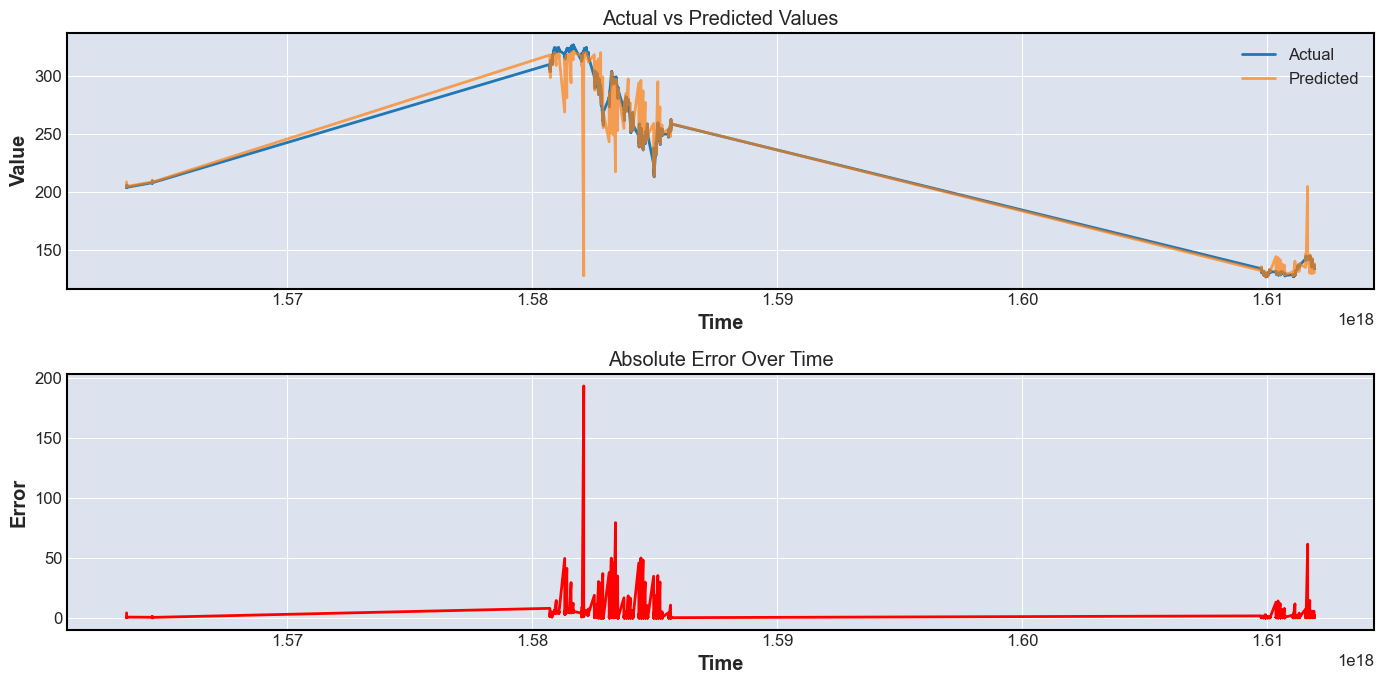

In [31]:
plt.figure(figsize=(14, 7))

# Plot actual vs. predicted values
plt.subplot(2, 1, 1)
plt.plot(comparison_df['Time'], comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Time'], comparison_df['Predicted'], label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Plot the absolute error over time
plt.subplot(2, 1, 2)
plt.plot(comparison_df['Time'], comparison_df['Absolute Error'], label='Absolute Error', color='red')
plt.title('Absolute Error Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.tight_layout()

plt.show()

In [1]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print("GPU Devices:", physical_devices)

GPU Devices: []


In [2]:
pip install tensorflow-macos


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
Y

NameError: name 'Y' is not defined